In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import IsolationForest
import glob
import os

In [2]:
# load the Santander customer satisfaction dataset from Kaggle

data = pd.read_csv('2018Floor4.csv', low_memory=False)
data.shape

(264960, 30)

In [3]:
data.head()

,Date,z1_AC1(kW),z1_AC2(kW),z1_AC3(kW),z1_AC4(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),...,z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(degC),z5_S1(RH%),z5_S1(lux)
0,2018-07-01 00:00:00,0.0,0.0,0.0,8.74,0.00,0.22,28.28,62.50,0.0,...,0.07,NaN,NaN,NaN,0.0,0.0,0.15,27.73,62.86,0.0
1,2018-07-01 00:01:00,0.0,0.0,0.0,8.74,0.00,0.23,28.29,62.50,0.0,...,0.07,NaN,NaN,NaN,0.0,0.0,0.14,27.73,62.87,0.0
2,2018-07-01 00:02:00,0.0,0.0,0.0,8.61,0.00,0.22,28.29,62.50,0.0,...,0.08,NaN,NaN,NaN,0.0,0.0,0.14,27.72,62.88,0.0
3,2018-07-01 00:03:00,0.0,0.0,0.0,8.81,0.01,0.23,28.29,62.50,0.0,...,0.08,NaN,NaN,NaN,0.0,0.0,0.14,27.72,62.88,0.0
4,2018-07-01 00:04:00,0.0,0.0,0.0,8.89,0.00,0.22,28.29,62.51,0.0,...,0.07,NaN,NaN,NaN,0.0,0.0,0.14,27.72,62.88,0.0


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264960 entries, 0 to 264959
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          264960 non-null  object 
 1   z1_AC1(kW)    230352 non-null  float64
 2   z1_AC2(kW)    230352 non-null  float64
 3   z1_AC3(kW)    230352 non-null  float64
 4   z1_AC4(kW)    230785 non-null  float64
 5   z1_Light(kW)  214890 non-null  float64
 6   z1_Plug(kW)   231552 non-null  float64
 7   z1_S1(degC)   99894 non-null   float64
 8   z1_S1(RH%)    99894 non-null   float64
 9   z1_S1(lux)    99894 non-null   float64
 10  z2_AC1(kW)    230791 non-null  float64
 11  z2_Light(kW)  214890 non-null  float64
 12  z2_Plug(kW)   214890 non-null  float64
 13  z2_S1(degC)   100814 non-null  float64
 14  z2_S1(RH%)    100814 non-null  float64
 15  z2_S1(lux)    100814 non-null  float64
 16  z3_Light(kW)  231538 non-null  float64
 17  z3_Plug(kW)   231547 non-null  float64
 18  z4_A

In [5]:
data.iloc[:,:15].describe()

,z1_AC1(kW),z1_AC2(kW),z1_AC3(kW),z1_AC4(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_Light(kW),z2_Plug(kW),z2_S1(degC),z2_S1(RH%)
count,230352.000000,230352.000000,230352.000000,230785.000000,214890.000000,231552.000000,99894.000000,99894.000000,99894.000000,230791.000000,214890.000000,214890.000000,100814.000000,100814.000000
mean,0.000306,0.009987,0.000654,4.367243,1.656181,1.063008,27.416257,59.915580,14.207420,3.089167,0.902794,0.283332,26.574745,64.211420
std,0.048881,0.145749,0.038523,8.884456,1.973602,1.155196,1.949237,3.437208,17.313378,6.677755,1.139147,0.234669,1.708125,3.094987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.690000,47.760000,0.000000,0.000000,0.000000,0.000000,21.100000,53.370000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.280000,27.360000,57.700000,0.000000,0.000000,0.000000,0.130000,26.400000,61.900000
50%,0.000000,0.000000,0.000000,0.000000,0.010000,0.400000,27.980000,59.610000,2.000000,0.000000,0.000000,0.220000,27.130000,63.570000
75%,0.000000,0.000000,0.000000,0.000000,3.610000,1.740000,28.600000,62.180000,34.000000,0.000000,2.160000,0.360000,27.650000,66.870000
max,22.290000,20.280000,9.910000,49.220000,63.110000,87.110000,30.900000,69.400000,54.000000,44.350000,32.590000,4.770000,29.900000,75.700000


In [6]:
data.iloc[:,15:].describe()

,z2_S1(lux),z3_Light(kW),z3_Plug(kW),z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(degC),z5_S1(RH%),z5_S1(lux)
count,100814.000000,231538.000000,231547.000000,230790.000000,230275.000000,230729.000000,96137.000000,96137.000000,96137.000000,230794.000000,230275.000000,231548.000000,97161.000000,97161.000000,97161.000000
mean,13.903744,0.372179,0.372796,4.168315,1.557151,0.405712,26.863556,60.076649,25.912656,1.529282,0.483020,0.239247,26.526051,63.837252,13.159508
std,20.030136,0.345082,0.068454,8.280668,1.625851,0.450039,2.501830,3.628890,28.416605,3.682130,0.746883,0.209967,1.474201,3.975367,20.788502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.920000,48.520000,0.000000,0.000000,0.000000,0.000000,22.480000,44.910000,0.000000
25%,0.000000,0.020000,0.350000,0.000000,0.000000,0.090000,26.660000,57.460000,0.000000,0.000000,0.000000,0.130000,26.240000,61.180000,0.000000
50%,0.000000,0.310000,0.370000,0.000000,0.910000,0.110000,27.600000,60.140000,6.000000,0.000000,0.000000,0.160000,26.840000,64.120000,0.000000
75%,32.000000,0.630000,0.390000,0.000000,3.400000,0.720000,28.500000,62.680000,56.000000,0.000000,0.970000,0.330000,27.460000,66.640000,24.000000
max,64.000000,8.550000,3.140000,51.450000,26.700000,9.520000,30.900000,71.950000,82.000000,54.580000,58.610000,3.140000,29.900000,73.900000,60.000000


array([[<AxesSubplot:title={'center':'z1_AC1(kW)'}>,
        <AxesSubplot:title={'center':'z1_AC2(kW)'}>,
        <AxesSubplot:title={'center':'z1_AC3(kW)'}>,
        <AxesSubplot:title={'center':'z1_AC4(kW)'}>,
        <AxesSubplot:title={'center':'z1_Light(kW)'}>],
       [<AxesSubplot:title={'center':'z1_Plug(kW)'}>,
        <AxesSubplot:title={'center':'z1_S1(degC)'}>,
        <AxesSubplot:title={'center':'z1_S1(RH%)'}>,
        <AxesSubplot:title={'center':'z1_S1(lux)'}>,
        <AxesSubplot:title={'center':'z2_AC1(kW)'}>],
       [<AxesSubplot:title={'center':'z2_Light(kW)'}>,
        <AxesSubplot:title={'center':'z2_Plug(kW)'}>,
        <AxesSubplot:title={'center':'z2_S1(degC)'}>,
        <AxesSubplot:title={'center':'z2_S1(RH%)'}>,
        <AxesSubplot:title={'center':'z2_S1(lux)'}>],
       [<AxesSubplot:title={'center':'z3_Light(kW)'}>,
        <AxesSubplot:title={'center':'z3_Plug(kW)'}>,
        <AxesSubplot:title={'center':'z4_AC1(kW)'}>,
        <AxesSubplot:title={'cen

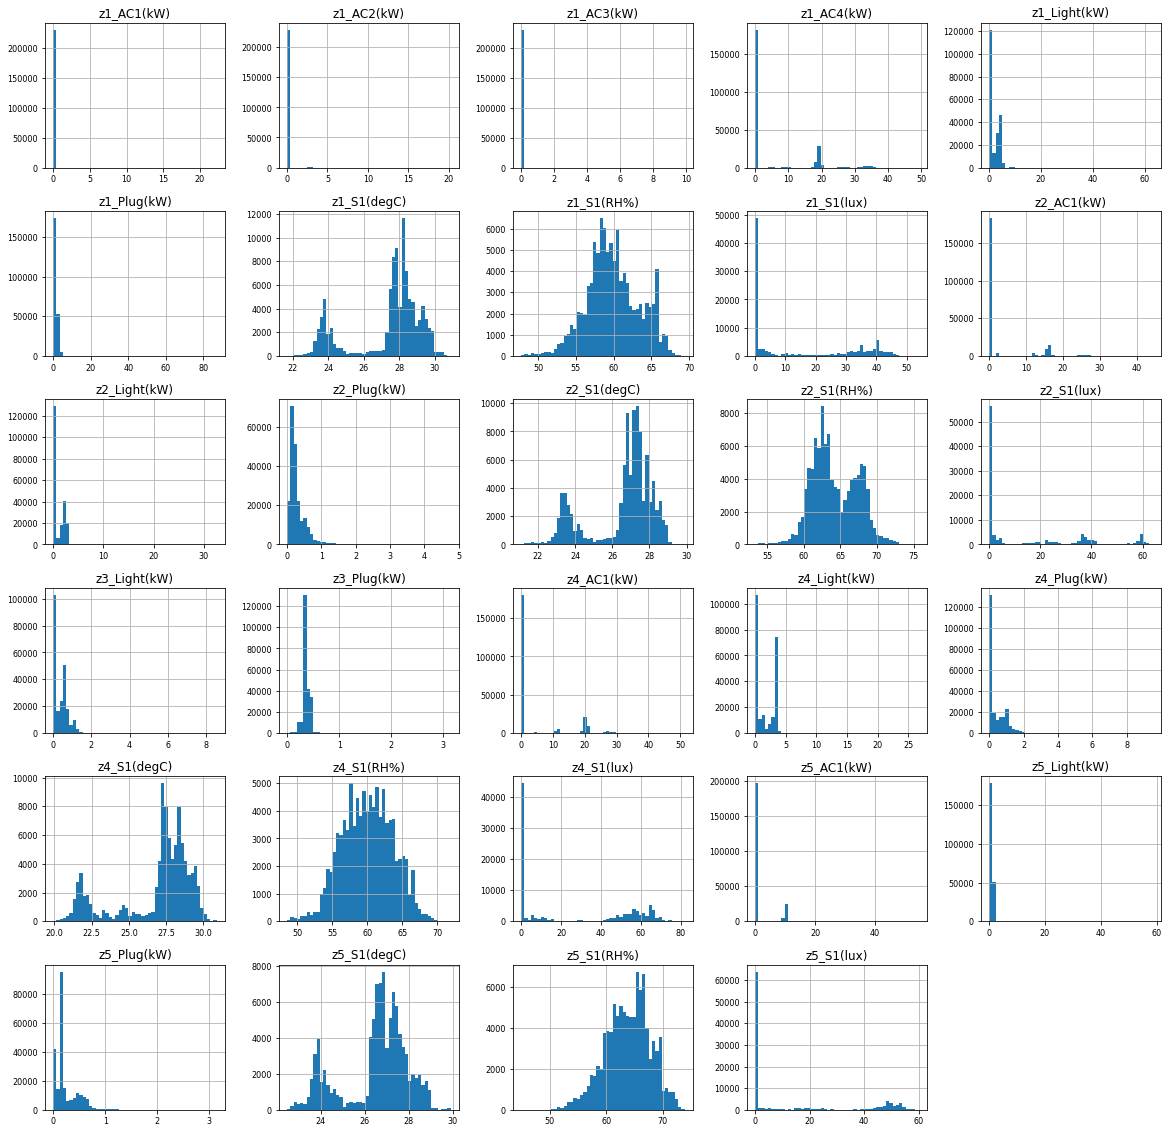

In [7]:
data.hist(figsize=(20,20),bins=50,xlabelsize=8,ylabelsize=8)

In [8]:
# Check for any missing values
data.isnull().sum()


Date                 0
z1_AC1(kW)       34608
z1_AC2(kW)       34608
z1_AC3(kW)       34608
z1_AC4(kW)       34175
z1_Light(kW)     50070
z1_Plug(kW)      33408
z1_S1(degC)     165066
z1_S1(RH%)      165066
z1_S1(lux)      165066
z2_AC1(kW)       34169
z2_Light(kW)     50070
z2_Plug(kW)      50070
z2_S1(degC)     164146
z2_S1(RH%)      164146
z2_S1(lux)      164146
z3_Light(kW)     33422
z3_Plug(kW)      33413
z4_AC1(kW)       34170
z4_Light(kW)     34685
z4_Plug(kW)      34231
z4_S1(degC)     168823
z4_S1(RH%)      168823
z4_S1(lux)      168823
z5_AC1(kW)       34166
z5_Light(kW)     34685
z5_Plug(kW)      33412
z5_S1(degC)     167799
z5_S1(RH%)      167799
z5_S1(lux)      167799
dtype: int64

In [9]:
#With consideration that null means no consumptions
data.fillna(0,inplace=True)

In [10]:
# Check for any missing values after handling them

data.isnull().sum()


Date            0
z1_AC1(kW)      0
z1_AC2(kW)      0
z1_AC3(kW)      0
z1_AC4(kW)      0
z1_Light(kW)    0
z1_Plug(kW)     0
z1_S1(degC)     0
z1_S1(RH%)      0
z1_S1(lux)      0
z2_AC1(kW)      0
z2_Light(kW)    0
z2_Plug(kW)     0
z2_S1(degC)     0
z2_S1(RH%)      0
z2_S1(lux)      0
z3_Light(kW)    0
z3_Plug(kW)     0
z4_AC1(kW)      0
z4_Light(kW)    0
z4_Plug(kW)     0
z4_S1(degC)     0
z4_S1(RH%)      0
z4_S1(lux)      0
z5_AC1(kW)      0
z5_Light(kW)    0
z5_Plug(kW)     0
z5_S1(degC)     0
z5_S1(RH%)      0
z5_S1(lux)      0
dtype: int64

array([[<AxesSubplot:title={'center':'z1_AC1(kW)'}>,
        <AxesSubplot:title={'center':'z1_AC2(kW)'}>,
        <AxesSubplot:title={'center':'z1_AC3(kW)'}>,
        <AxesSubplot:title={'center':'z1_AC4(kW)'}>,
        <AxesSubplot:title={'center':'z1_Light(kW)'}>],
       [<AxesSubplot:title={'center':'z1_Plug(kW)'}>,
        <AxesSubplot:title={'center':'z1_S1(degC)'}>,
        <AxesSubplot:title={'center':'z1_S1(RH%)'}>,
        <AxesSubplot:title={'center':'z1_S1(lux)'}>,
        <AxesSubplot:title={'center':'z2_AC1(kW)'}>],
       [<AxesSubplot:title={'center':'z2_Light(kW)'}>,
        <AxesSubplot:title={'center':'z2_Plug(kW)'}>,
        <AxesSubplot:title={'center':'z2_S1(degC)'}>,
        <AxesSubplot:title={'center':'z2_S1(RH%)'}>,
        <AxesSubplot:title={'center':'z2_S1(lux)'}>],
       [<AxesSubplot:title={'center':'z3_Light(kW)'}>,
        <AxesSubplot:title={'center':'z3_Plug(kW)'}>,
        <AxesSubplot:title={'center':'z4_AC1(kW)'}>,
        <AxesSubplot:title={'cen

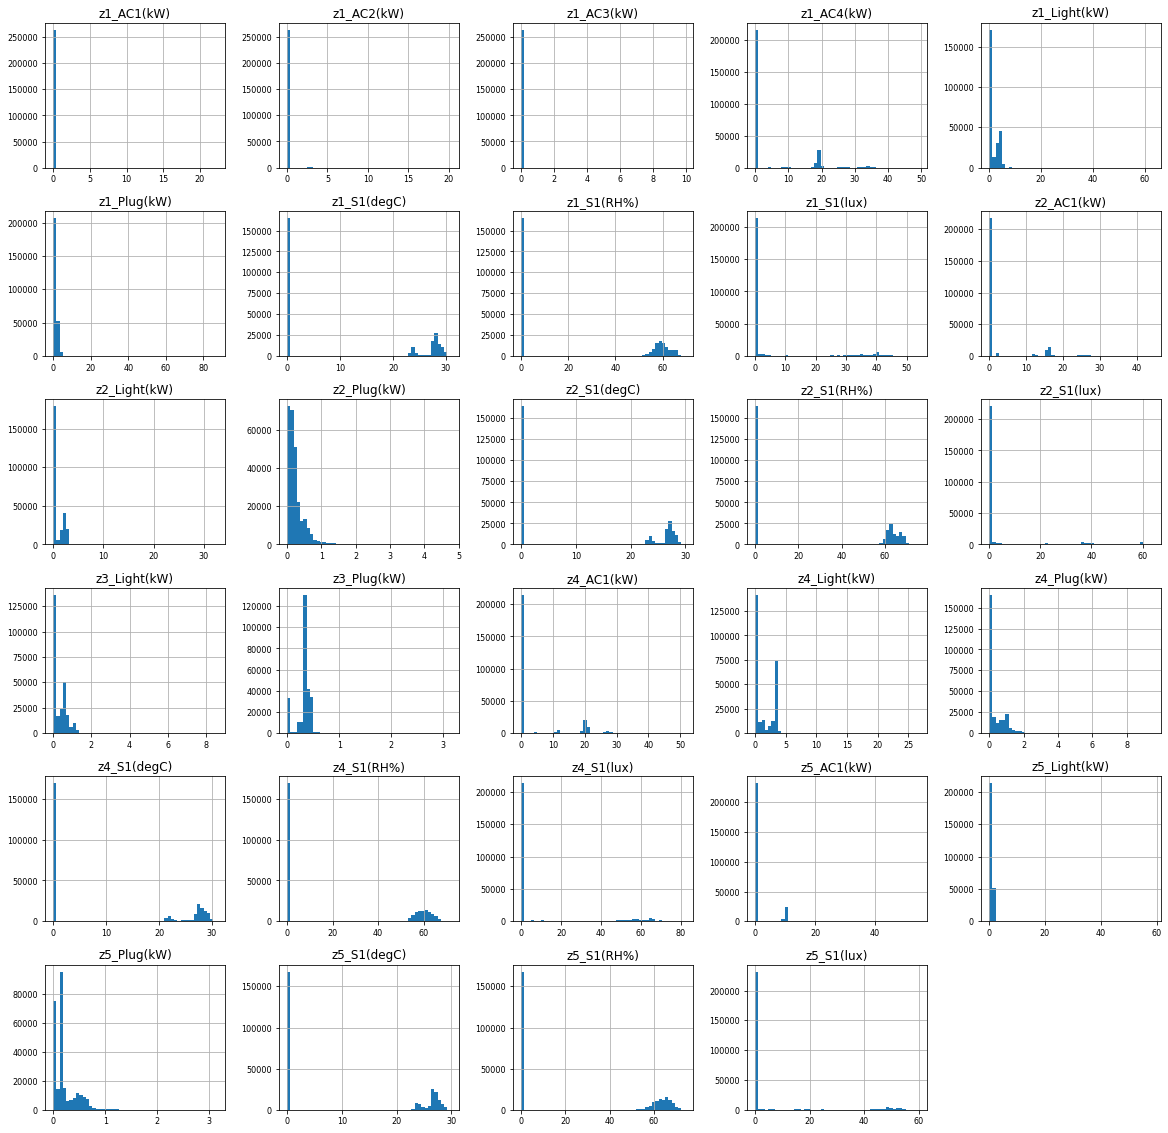

In [11]:
data.hist(figsize=(20,20),bins=50,xlabelsize=8,ylabelsize=8)

In [12]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264960 entries, 0 to 264959
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          264960 non-null  datetime64[ns]
 1   z1_AC1(kW)    264960 non-null  float64       
 2   z1_AC2(kW)    264960 non-null  float64       
 3   z1_AC3(kW)    264960 non-null  float64       
 4   z1_AC4(kW)    264960 non-null  float64       
 5   z1_Light(kW)  264960 non-null  float64       
 6   z1_Plug(kW)   264960 non-null  float64       
 7   z1_S1(degC)   264960 non-null  float64       
 8   z1_S1(RH%)    264960 non-null  float64       
 9   z1_S1(lux)    264960 non-null  float64       
 10  z2_AC1(kW)    264960 non-null  float64       
 11  z2_Light(kW)  264960 non-null  float64       
 12  z2_Plug(kW)   264960 non-null  float64       
 13  z2_S1(degC)   264960 non-null  float64       
 14  z2_S1(RH%)    264960 non-null  float64       
 15  z2_S1(lux)    264

In [14]:
data.to_csv('2018Floor3_cleaned.csv',index=False)